### Pacotes necessários

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing
import graphviz
import os

In [2]:
os.listdir()

['.ipynb_checkpoints', 'Minha primeira árvore de decisão.ipynb', 'celulas.csv']

### Importando a base e definindo as variáveis explicativas

In [3]:
df = pd.read_csv( "celulas.csv", sep=";" )
colunas = [ 'nucleos', 'caudas', 'cor', 'membrana' ]
target = 'classe'
names = np.sort( df[target].unique() )

### Transformando variáveis categóricas em numéricas

In [4]:
onehot = preprocessing.OneHotEncoder(sparse=False)

onehot.fit( df[ colunas[2:] ] )

X = pd.DataFrame(  onehot.transform( df[ colunas[2:] ] ),
                   columns=onehot.get_feature_names( colunas[2:] ) )

X = pd.concat( [X, df[["nucleos", "caudas"]]], axis=1 )

### Treinando árvore de decisão

In [5]:
minha_arvore = tree.DecisionTreeClassifier()
minha_arvore.fit( X=X,  y=df[target] )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Plotando árvore de decisão

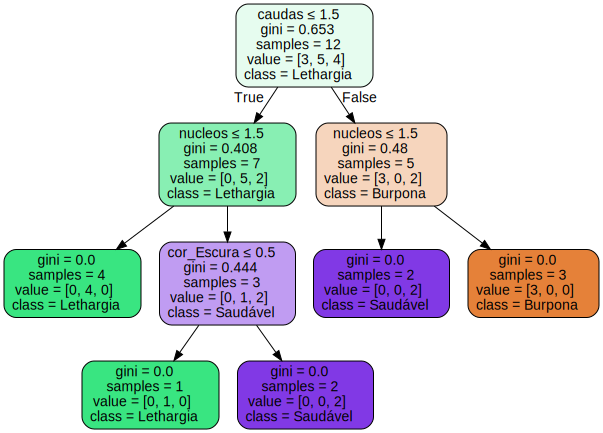

In [6]:
dot_data = tree.export_graphviz(minha_arvore, out_file=None, feature_names=X.columns,class_names=names,
                                 filled=True, rounded=True, special_characters=True)  

graph = graphviz.Source(dot_data)
graph

In [7]:
pd.DataFrame( minha_arvore.feature_importances_, index = X.columns )

,0
cor_Clara,0.000000
cor_Escura,0.170213
membrana_Fina,0.000000
membrana_Grossa,0.000000
nucleos,0.500912
caudas,0.328875
